In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kaggles-most-upvoted-datasets-overview/kaggle_top_100_dataset.csv


# Data Loading and Preprocessing

In [2]:
df = pd.read_csv('/kaggle/input/kaggles-most-upvoted-datasets-overview/kaggle_top_100_dataset.csv', encoding='ISO-8859-1',sep=';')

In [3]:
df

,Dataset_Name,Author,Last_Update,Usability,File_Count,Data_Type,Size,Upvote,Rank
0,Bitcoin Historical Data,Zielak,2025,100,1,CSV,98 MB,3693,Gold
1,International football results from 1872 to 2025,Mart Jürisoo,2025,100,4,CSV,1 MB,2315,Gold
2,Fruits-360 dataset,Mihai Oltean,2025,88,240356,other,4 GB,3133,Gold
3,Formula 1 World Championship (1950 - 2024),Vopani,2025,100,14,CSV,7 MB,1937,Gold
4,arXiv Dataset,Cornell University,2025,88,1,JSON,2 GB,1480,Bronze
...,...,...,...,...,...,...,...,...,...
94,Video Game Sales,GregorySmith,2016,59,1,CSV,390 KB,6407,Gold
95,Iris Species,UCI Machine Learning,2016,79,2,"SQLITE, CSV",4 KB,4214,Gold
96,Breast Cancer Wisconsin (Diagnostic) Data Set,UCI Machine Learning,2016,85,1,CSV,50 KB,3790,Gold
97,House Sales in King County,"USA, harlfoxem",2016,60,71,CSV,798 KB,2229,Gold


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Dataset_Name  99 non-null     object
 1   Author        99 non-null     object
 2   Last_Update   99 non-null     int64 
 3   Usability     99 non-null     int64 
 4   File_Count    99 non-null     int64 
 5   Data_Type     99 non-null     object
 6   Size          99 non-null     object
 7   Upvote        99 non-null     int64 
 8   Rank          99 non-null     object
dtypes: int64(4), object(5)
memory usage: 7.1+ KB


In [5]:
df.describe(include='all')

,Dataset_Name,Author,Last_Update,Usability,File_Count,Data_Type,Size,Upvote,Rank
count,99,99,99.000000,99.000000,99.000000,99,99,99.000000,99
unique,99,77,NaN,NaN,NaN,10,83,NaN,3
top,Bitcoin Historical Data,Murat KOKLU,NaN,NaN,NaN,CSV,9 KB,NaN,Gold
freq,1,12,NaN,NaN,NaN,60,4,NaN,89
mean,NaN,NaN,2019.666667,86.535354,13430.535354,NaN,NaN,3325.989899,NaN
std,NaN,NaN,2.420153,11.292325,78438.982957,NaN,NaN,5298.328014,NaN
min,NaN,NaN,2016.000000,50.000000,1.000000,NaN,NaN,1401.000000,NaN
25%,NaN,NaN,2018.000000,79.000000,1.000000,NaN,NaN,1619.000000,NaN
50%,NaN,NaN,2019.000000,88.000000,2.000000,NaN,NaN,2229.000000,NaN
75%,NaN,NaN,2022.000000,97.000000,8.000000,NaN,NaN,3204.500000,NaN


In [6]:
df.isna().sum()

Dataset_Name    0
Author          0
Last_Update     0
Usability       0
File_Count      0
Data_Type       0
Size            0
Upvote          0
Rank            0
dtype: int64

# Vizualization Section 

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
sns.set_style('whitegrid')

In [9]:
df.columns

Index(['Dataset_Name', 'Author', 'Last_Update', 'Usability', 'File_Count',
       'Data_Type', 'Size', 'Upvote', 'Rank'],
      dtype='object')

In [10]:
cols = ['Dataset_Name', 'Author', 'Last_Update', 'Usability', 'File_Count',
       'Data_Type', 'Size', 'Upvote', 'Rank']

In [11]:
# for features in cols:
#     if features in df.columns:
#         plt.figure(figsize=(20,5))
#         sns.histplot(df[features].dropna(),kde=True,color='black')
#         plt.title(f"Histogram of {features}")
#         plt.xlabel(features)
#         plt.ylabel('Count')
#         plt.xticks(rotation=60)
#         plt.tight_layout()
#         plt.show()

* As we clearly see due to some features the data is imbalanced 

# Count plot

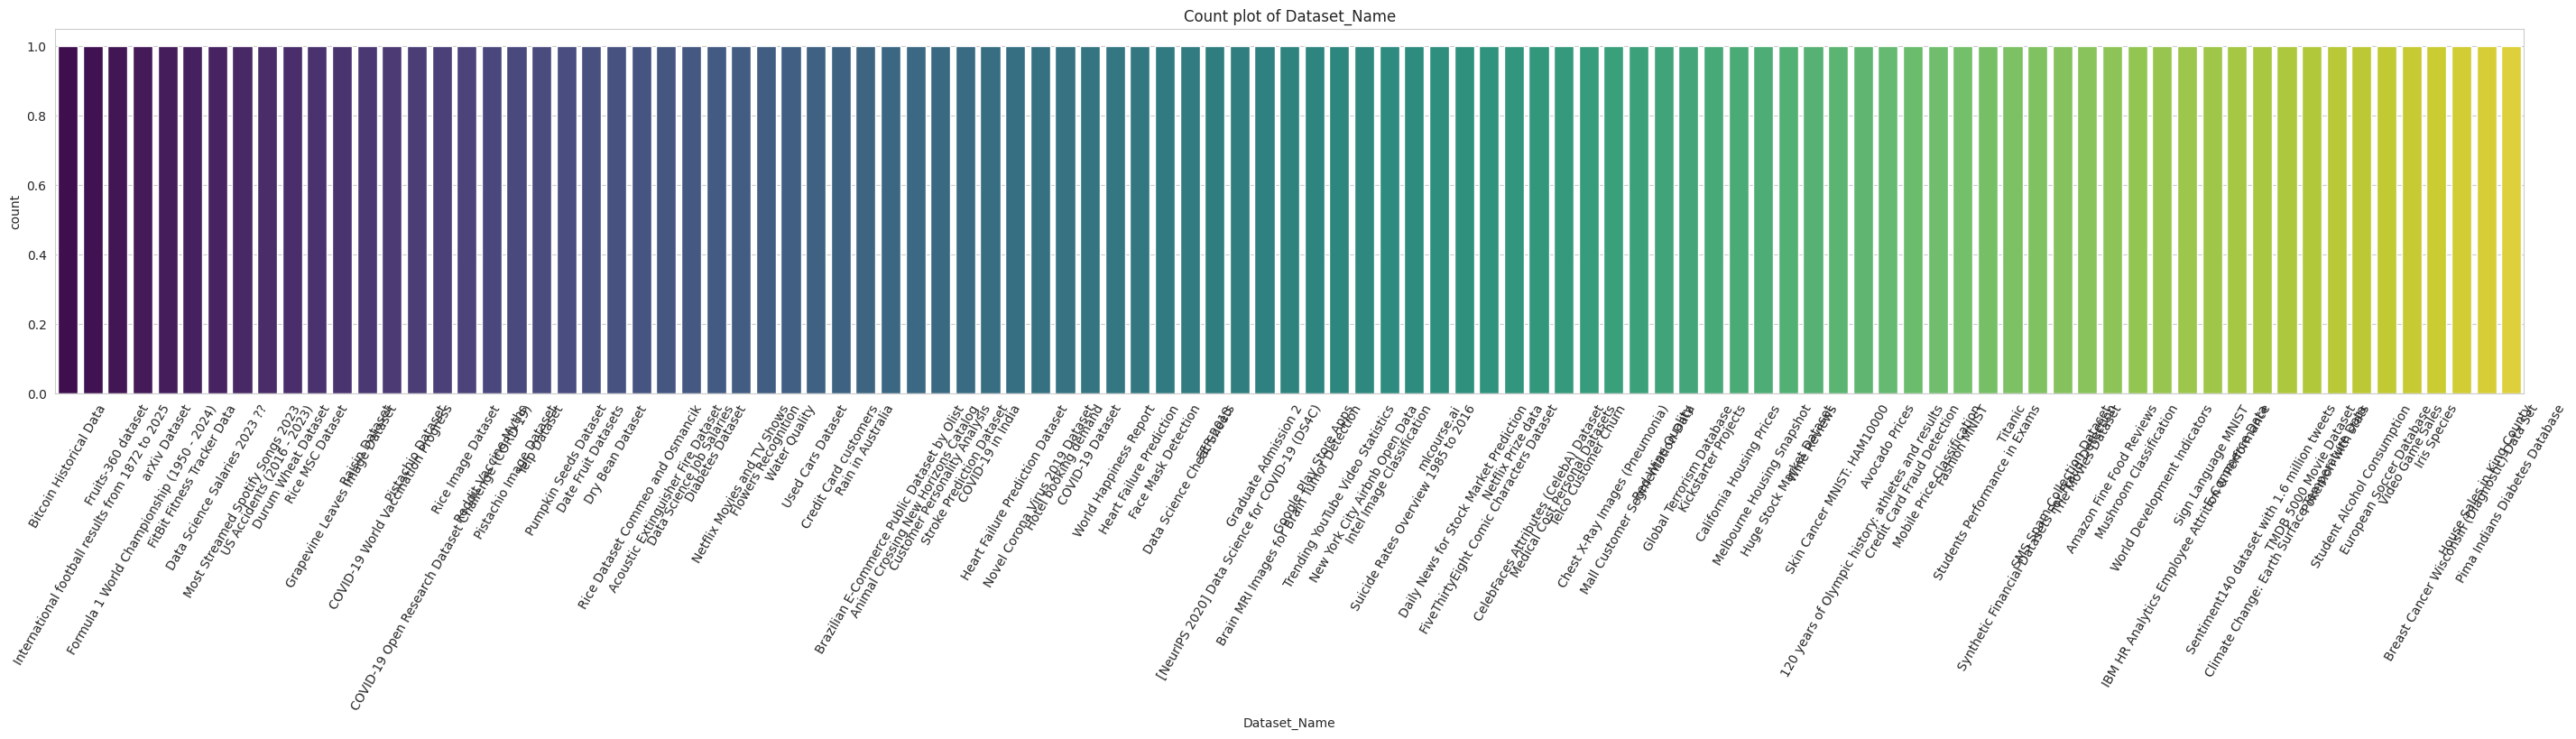

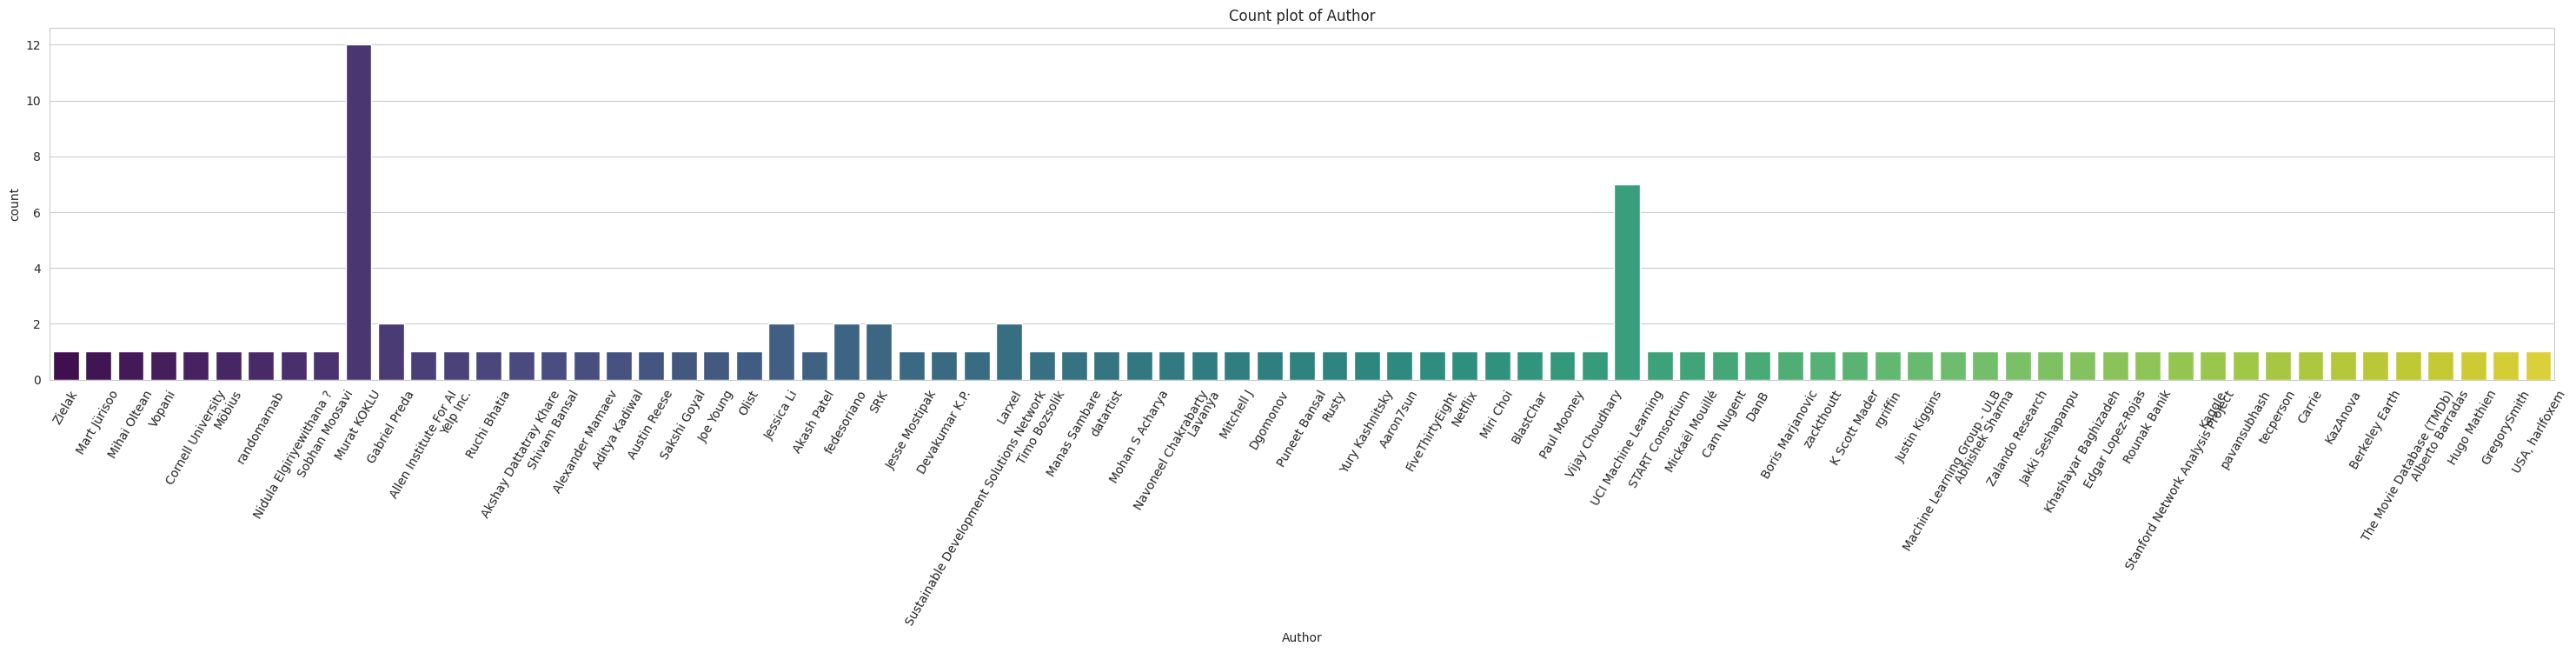

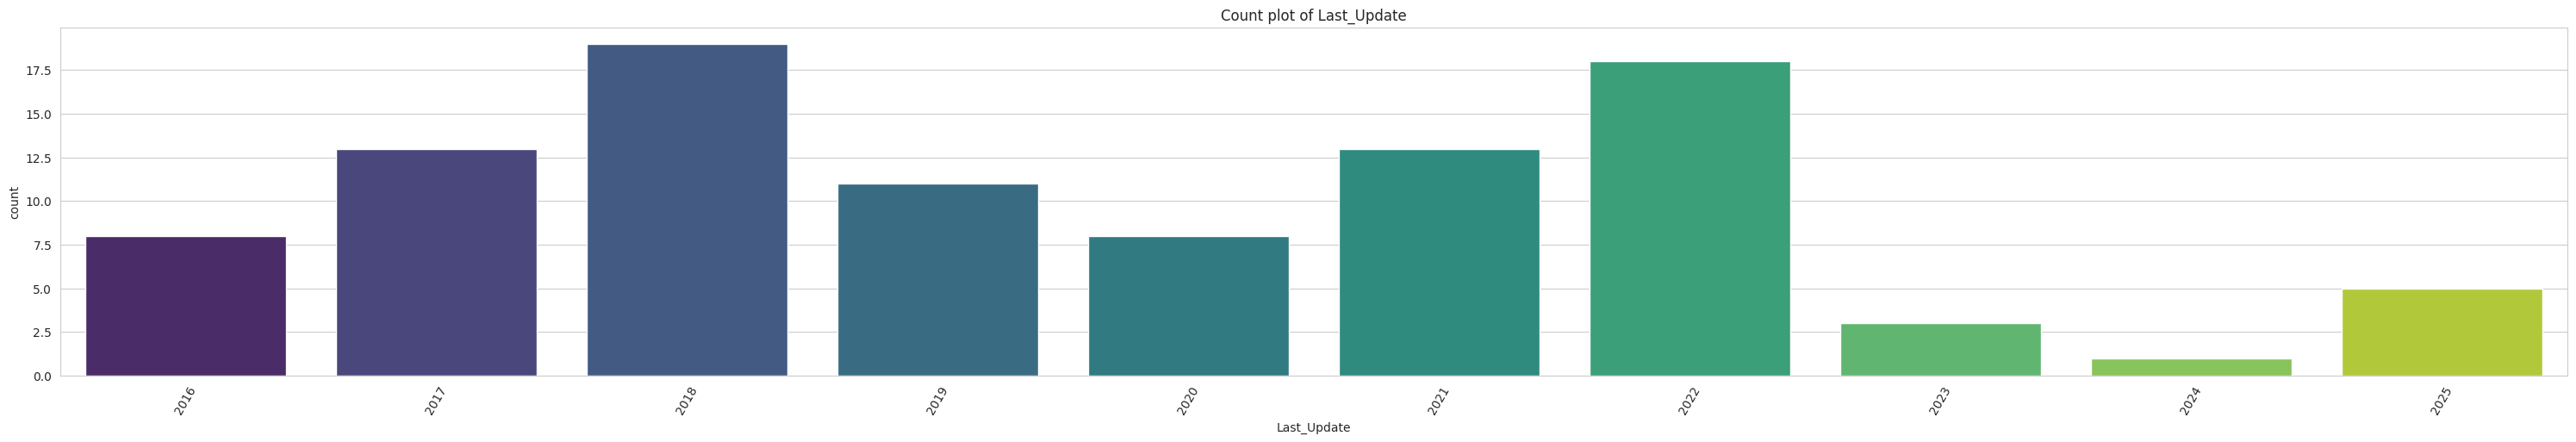

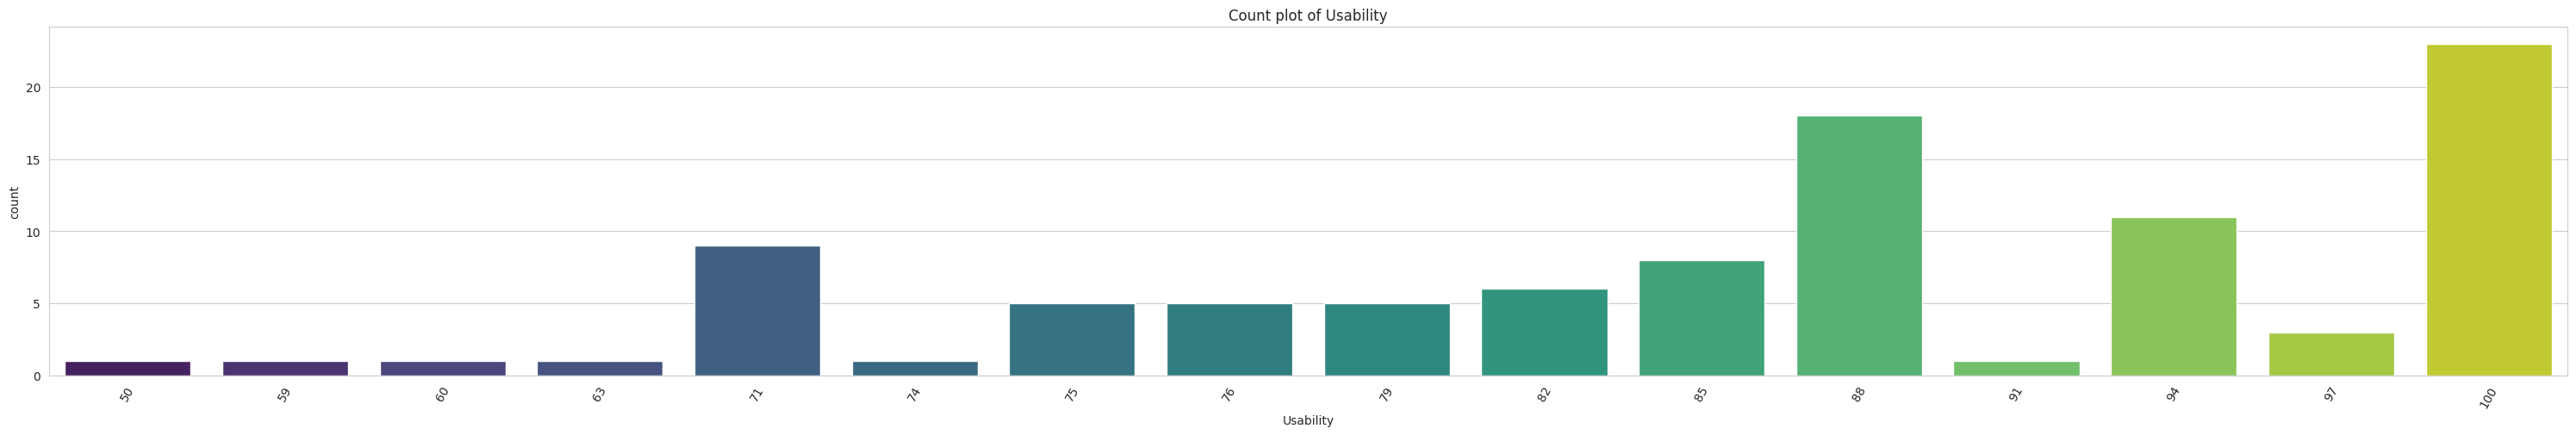

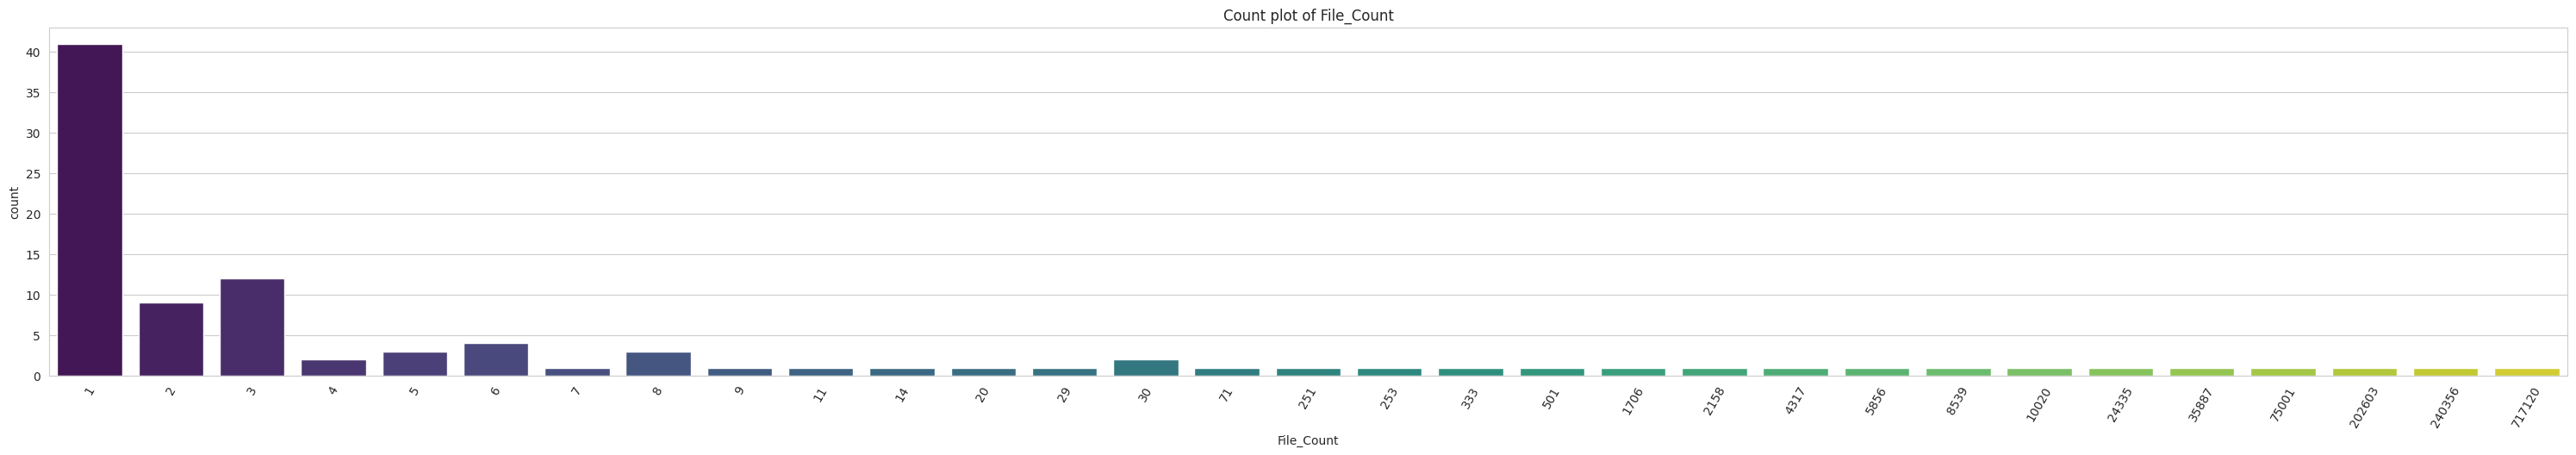

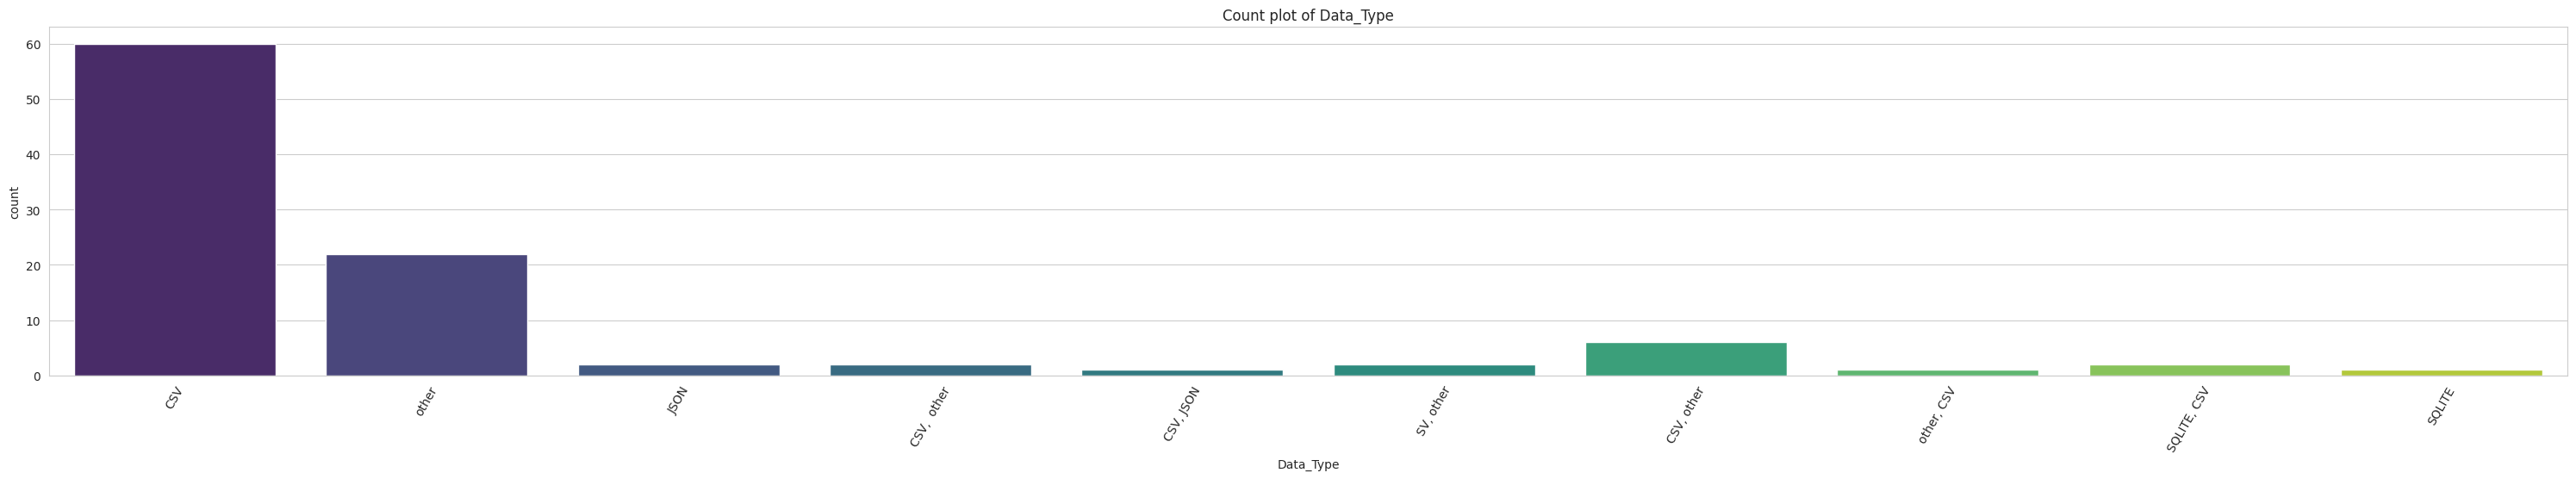

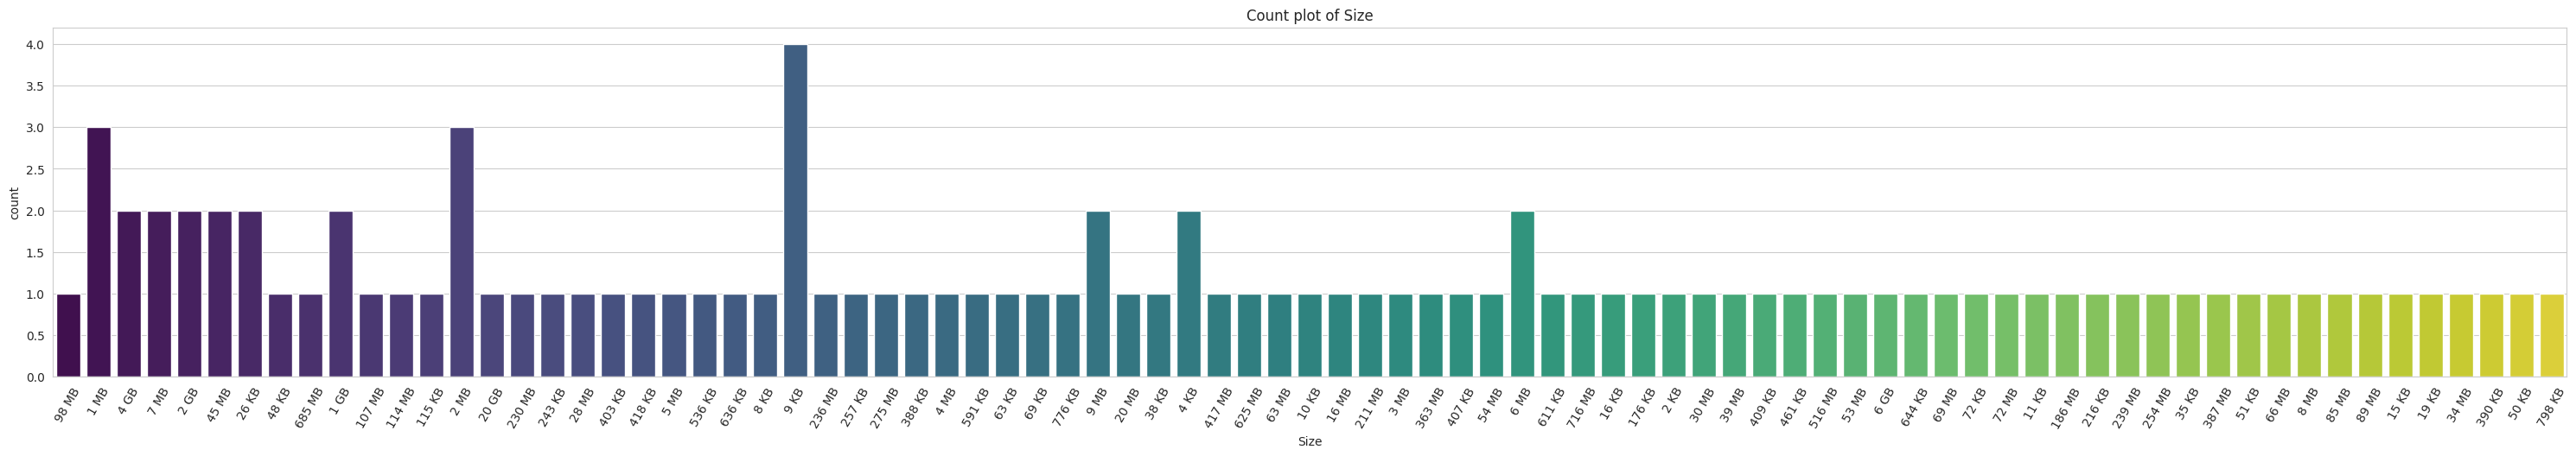

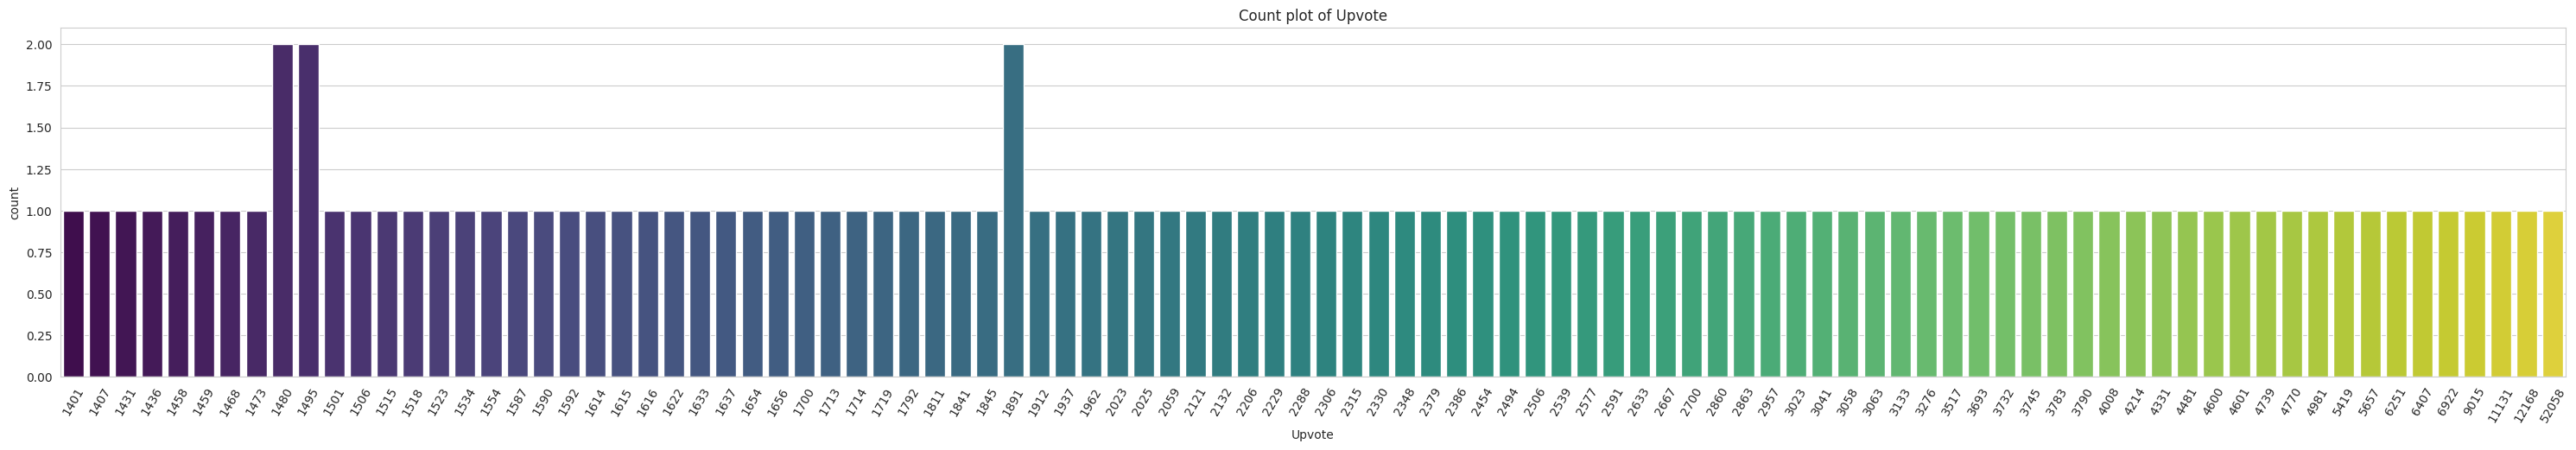

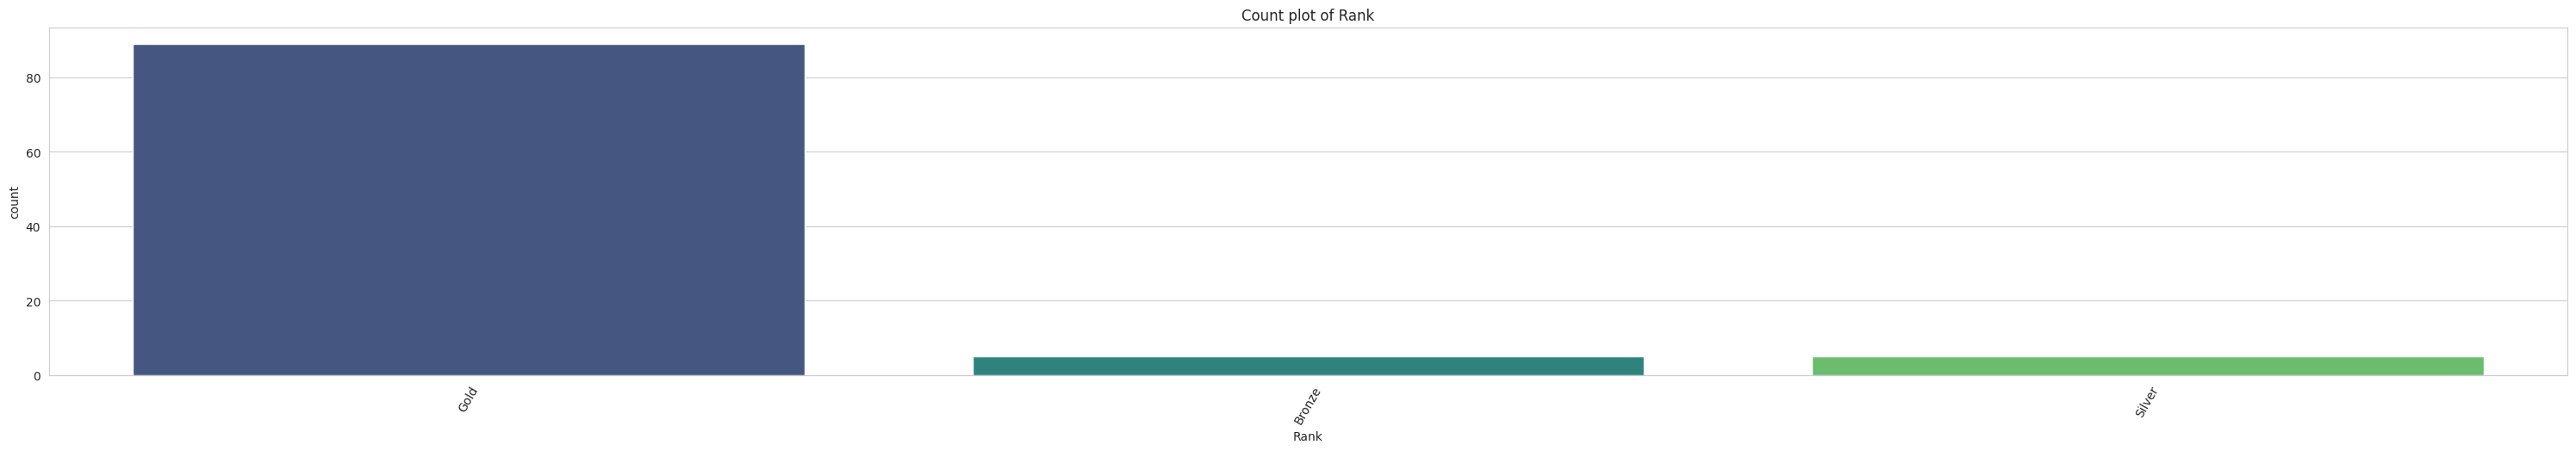

In [12]:
for features in cols:
    if features in df.columns:
        plt.figure(figsize=(30,5))
        sns.countplot(x=features,data=df,palette='viridis')
        plt.title(f"Count plot of {features}")
        plt.tight_layout()
        plt.xticks(rotation=60)
        plt.show()

# Line plot

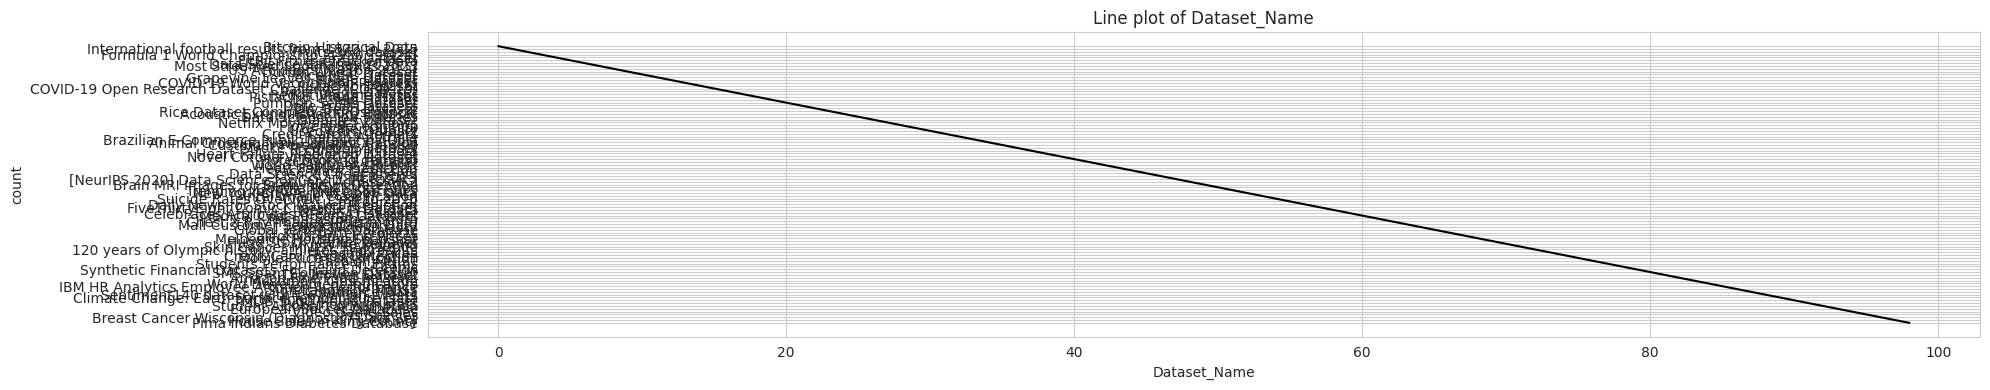

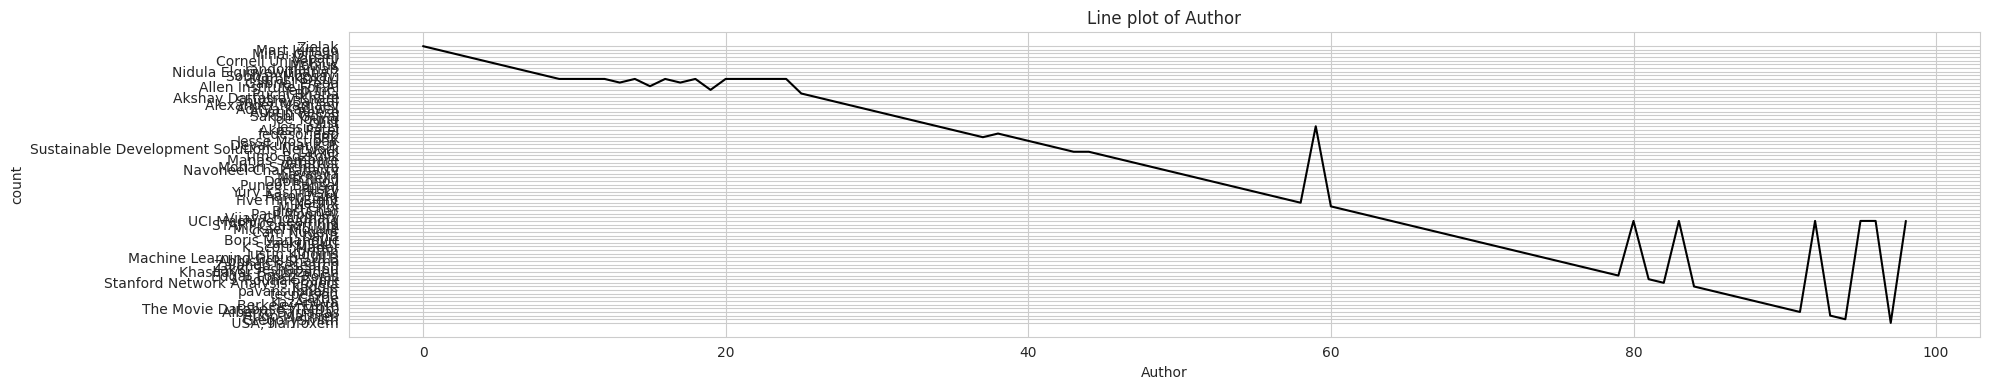

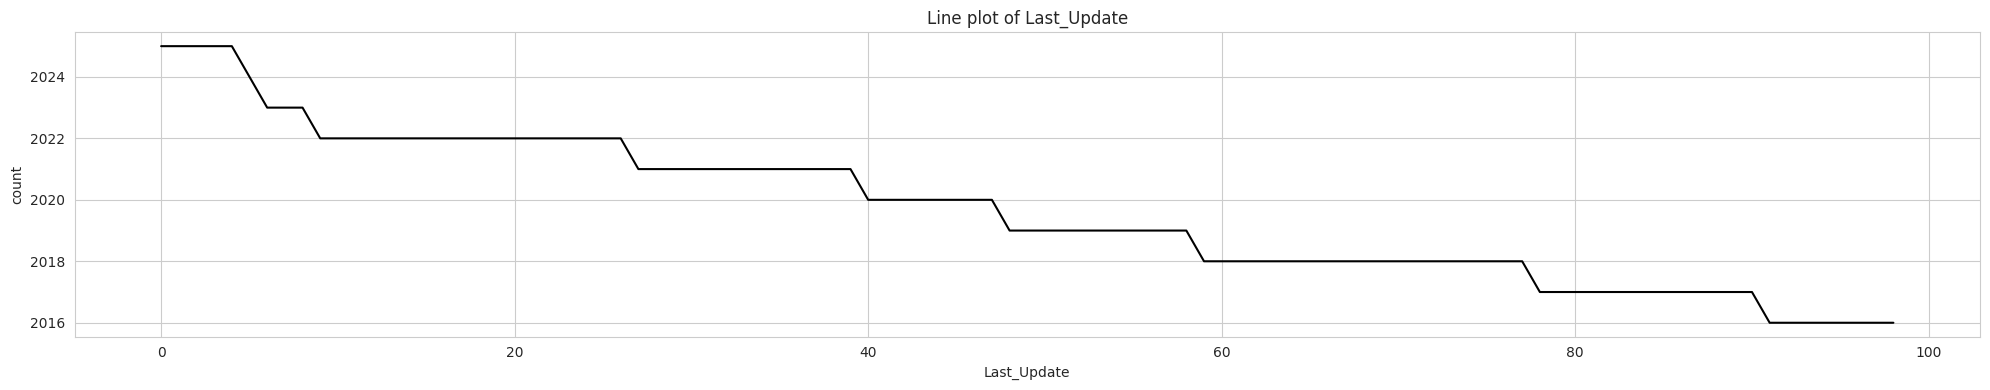

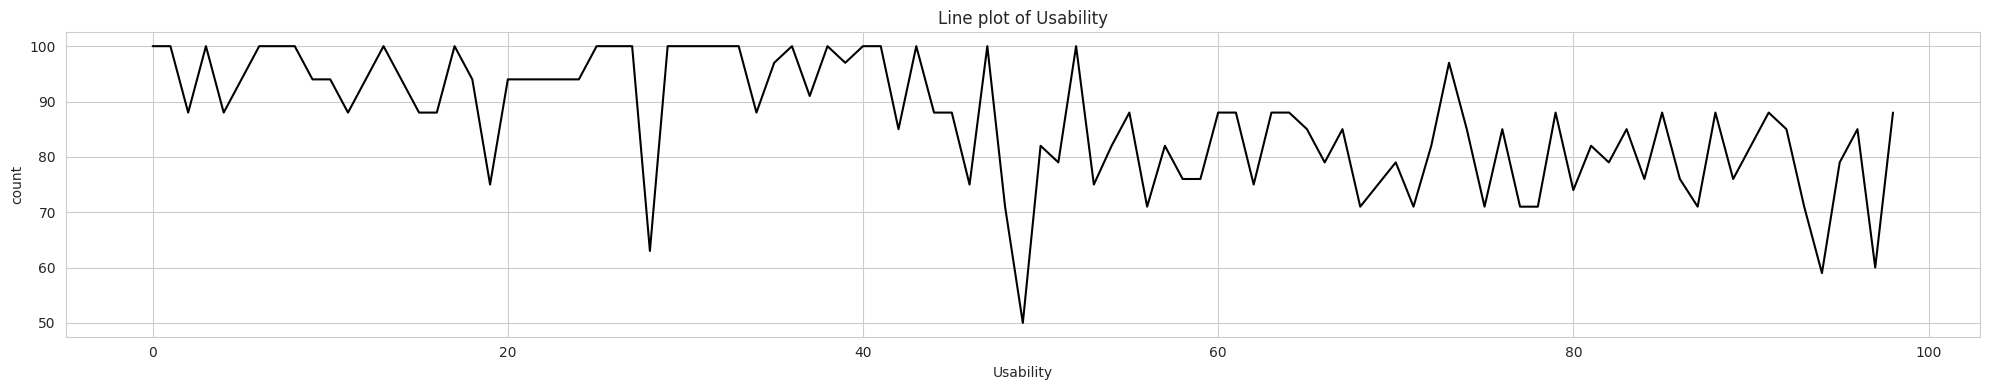

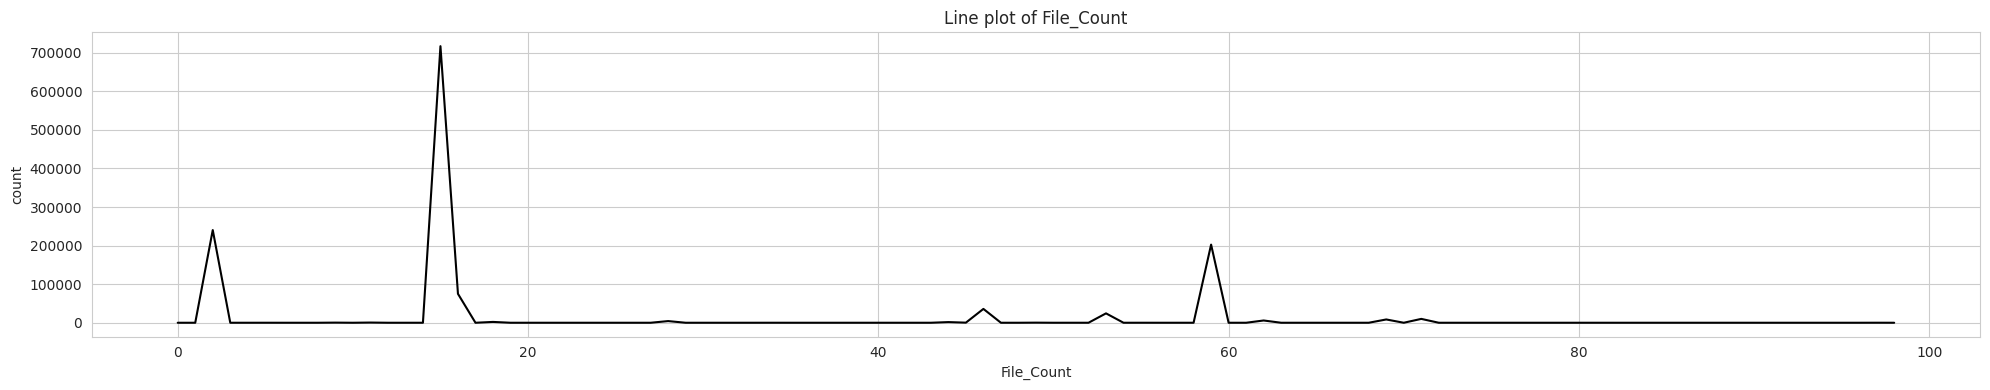

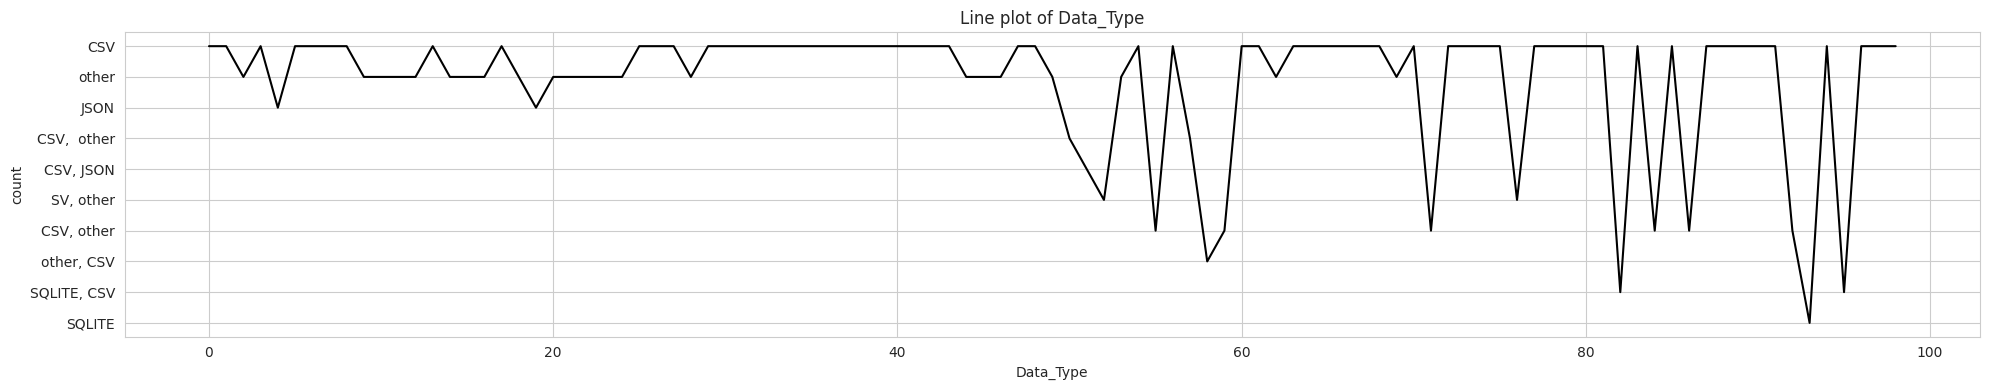

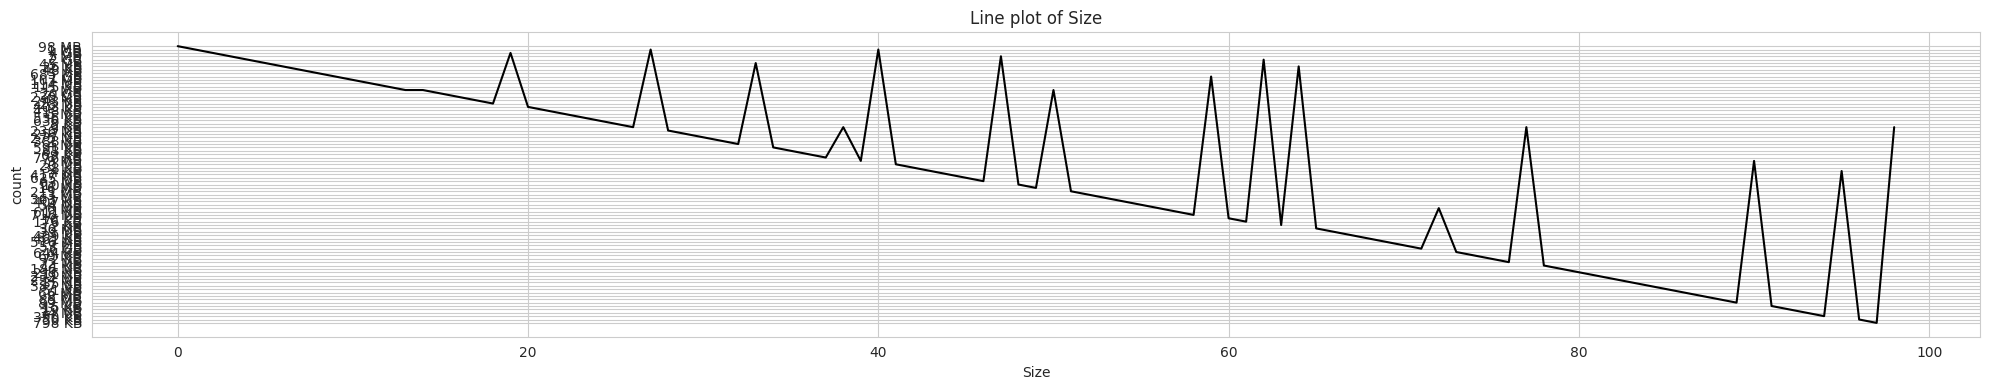

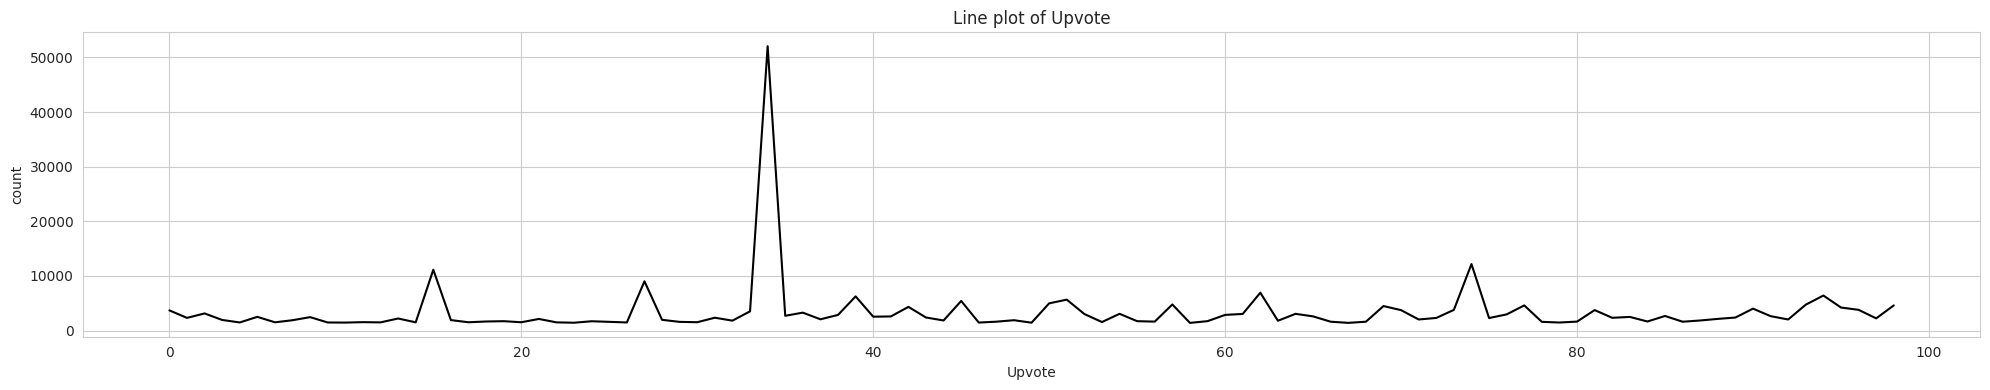

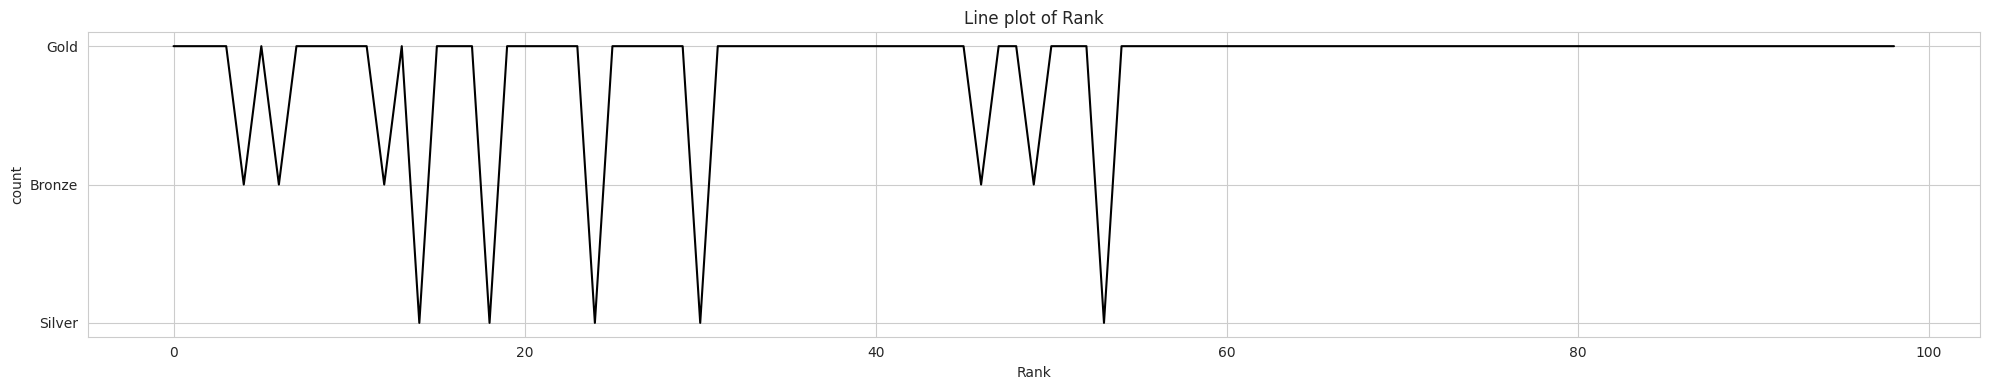

In [13]:
for features in cols:
    if features in df.columns:
        plt.figure(figsize=(20,4))
        sns.lineplot(df[features].dropna(),color='black')
        plt.title(f"Line plot of {features}")
        plt.xlabel(features)
        plt.ylabel('count')
        plt.tight_layout()
        plt.show()

# Correlation Matrix

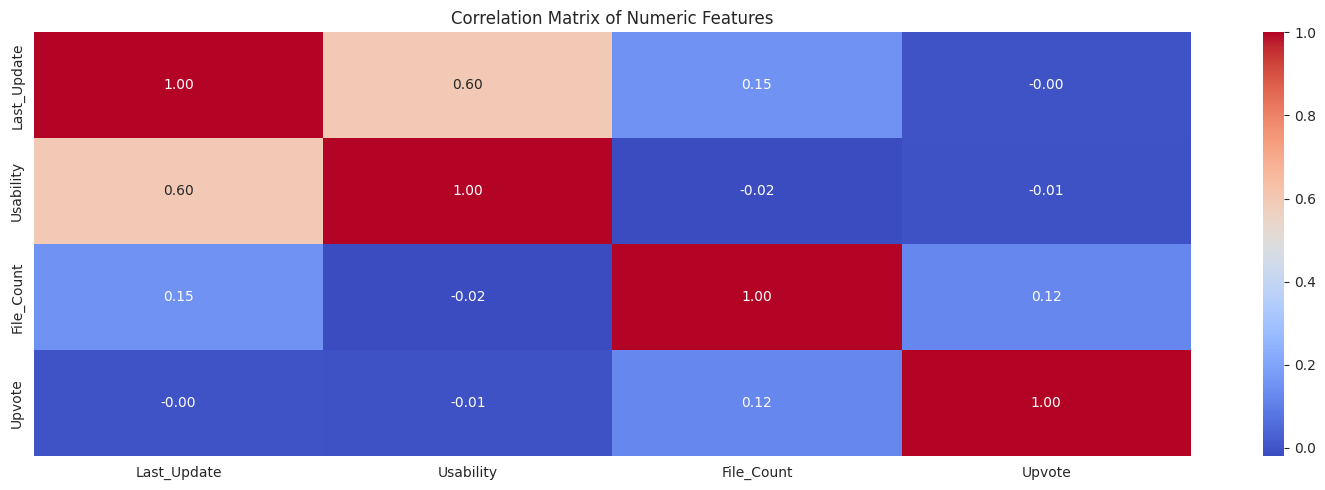

In [14]:
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >=3:
    plt.figure(figsize=(15,5))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
    plt.title(f"Correlation Matrix of Numeric Features")
    plt.tight_layout()
    plt.show()

# Feature Engineering

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Dataset_Name  99 non-null     object
 1   Author        99 non-null     object
 2   Last_Update   99 non-null     int64 
 3   Usability     99 non-null     int64 
 4   File_Count    99 non-null     int64 
 5   Data_Type     99 non-null     object
 6   Size          99 non-null     object
 7   Upvote        99 non-null     int64 
 8   Rank          99 non-null     object
dtypes: int64(4), object(5)
memory usage: 7.1+ KB


In [17]:
lab_cols= ['Dataset_Name', 'Author','Data_Type', 'Size','Rank']

In [18]:
le = LabelEncoder()

In [19]:
for column in lab_cols:
    df[column] = le.fit_transform(df[column])

In [20]:
df

,Dataset_Name,Author,Last_Update,Usability,File_Count,Data_Type,Size,Upvote,Rank
0,5,69,2025,100,1,0,82,3693,1
1,49,37,2025,100,4,0,1,2315,1
2,37,39,2025,88,240356,8,39,3133,1
3,36,65,2025,100,14,0,70,1937,1
4,97,15,2025,88,1,4,13,1480,0
...,...,...,...,...,...,...,...,...,...
94,90,22,2016,59,1,0,38,6407,1
95,50,63,2016,79,2,6,40,4214,1
96,8,63,2016,85,1,0,51,3790,1
97,45,0,2016,60,71,0,75,2229,1


# Correlation after Feature Engineering

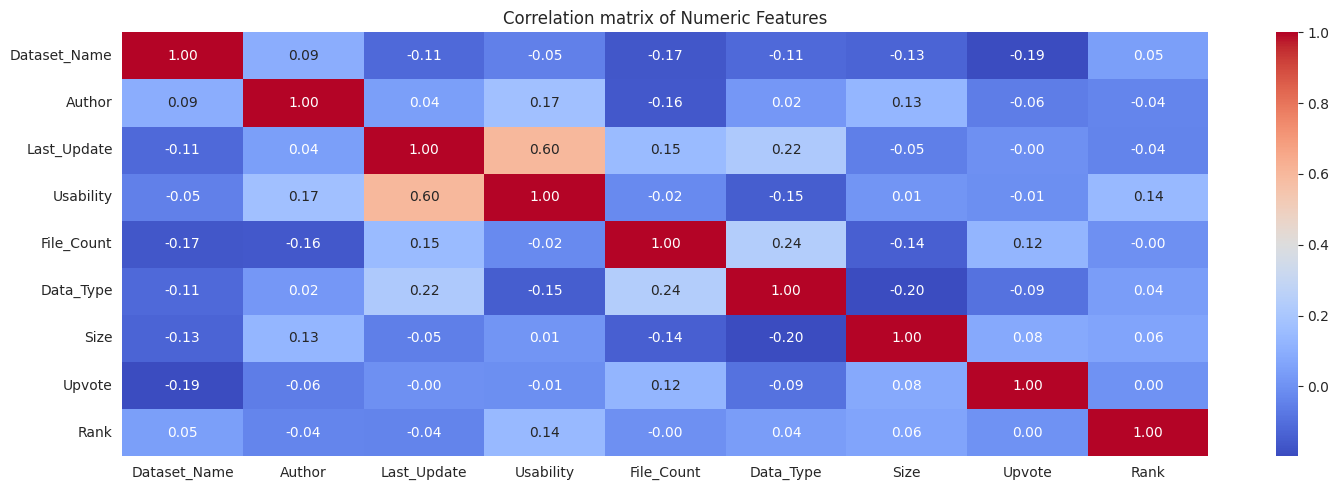

In [21]:
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1]>=3:
    plt.figure(figsize=(15,5))
    correlation_matrix_1  = numeric_df.corr()
    sns.heatmap(correlation_matrix_1,annot=True,cmap='coolwarm',fmt='.2f')
    plt.title(f"Correlation matrix of Numeric Features")
    plt.tight_layout()
    plt.show()

# Model section

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [23]:
df.head()

,Dataset_Name,Author,Last_Update,Usability,File_Count,Data_Type,Size,Upvote,Rank
0,5,69,2025,100,1,0,82,3693,1
1,49,37,2025,100,4,0,1,2315,1
2,37,39,2025,88,240356,8,39,3133,1
3,36,65,2025,100,14,0,70,1937,1
4,97,15,2025,88,1,4,13,1480,0


In [24]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [26]:
models = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "KNeighbors": KNeighborsClassifier(),
    "SVC": SVC(),
    "XGBoost": XGBClassifier(verbosity=0)
}

In [27]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1 Score': round(f1, 4)
    })


In [28]:
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print(results_df)


                Model  Accuracy  Precision  Recall  F1 Score
1        DecisionTree      0.85     0.8556    0.85    0.8438
0  LogisticRegression      0.85     0.7225    0.85    0.7811
2        RandomForest      0.85     0.7225    0.85    0.7811
5          KNeighbors      0.85     0.7225    0.85    0.7811
6                 SVC      0.85     0.7225    0.85    0.7811
7             XGBoost      0.85     0.7225    0.85    0.7811
3    GradientBoosting      0.80     0.7556    0.80    0.7771
4            AdaBoost      0.55     0.7167    0.55    0.6005


# Result plot

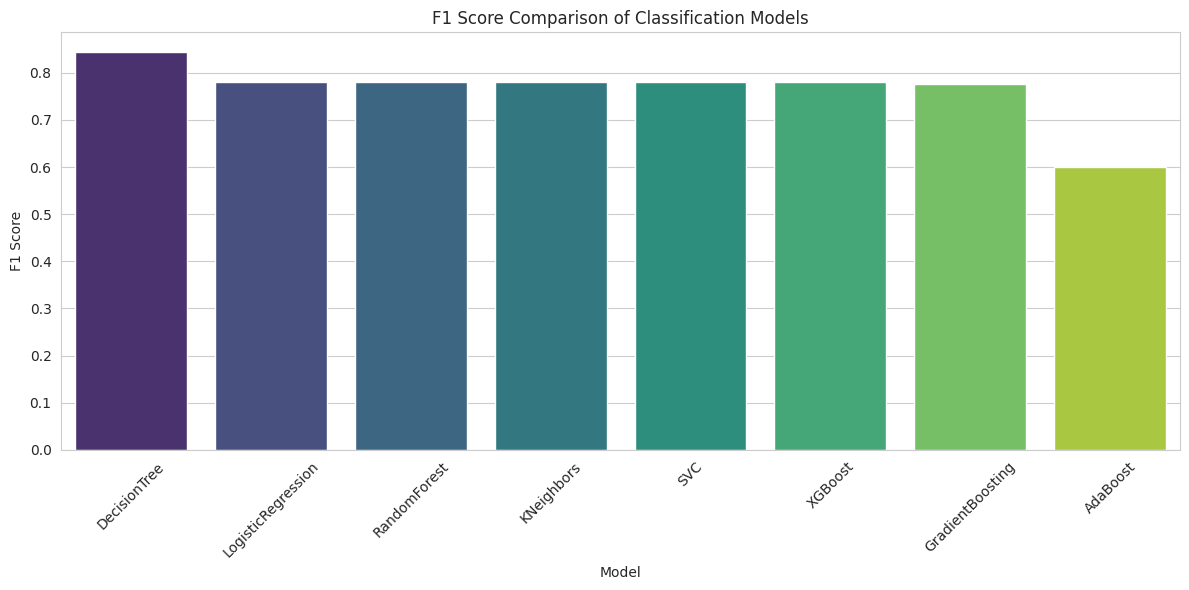

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='F1 Score', data=results_df, palette='viridis')
plt.title('F1 Score Comparison of Classification Models')
plt.ylabel('F1 Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conclusion comes around ~80%